In [2]:
import qiskit as qk

In [3]:
qr =qk.QuantumRegister(2)

In [4]:
cr = qk.ClassicalRegister(2)

In [5]:
qc = qk.QuantumCircuit(qr,cr)

In [6]:
qc.h(qr[0])
qc.cx(qr[0],qr[1])

In [7]:
qc.draw()

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0: 2/══════════

In [8]:
mes_Z = qk.QuantumCircuit(qr,cr)
mes_Z.measure(qr,cr)
mes_Z.draw()

┌─┐   
q0_0: ┤M├───
      └╥┘┌─┐
q0_1: ─╫─┤M├
       ║ └╥┘
c0: 2/═╩══╩═
       0  1

In [9]:
mes_X = qk.QuantumCircuit(qr,cr)
mes_X.h(qr)
mes_X.measure(qr,cr)
mes_X.draw()

┌───┐┌─┐   
q0_0: ┤ H ├┤M├───
      ├───┤└╥┘┌─┐
q0_1: ┤ H ├─╫─┤M├
      └───┘ ║ └╥┘
c0: 2/══════╩══╩═
            0  1

In [10]:
test_Z = qc + mes_Z
test_Z.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

In [11]:
test_X = qc + mes_X
test_X.draw()

┌───┐     ┌───┐┌─┐   
q0_0: ┤ H ├──■──┤ H ├┤M├───
      └───┘┌─┴─┐├───┤└╥┘┌─┐
q0_1: ─────┤ X ├┤ H ├─╫─┤M├
           └───┘└───┘ ║ └╥┘
c0: 2/════════════════╩══╩═
                      0  1

In [12]:
from qiskit import BasicAer
my_backend = BasicAer.get_backend("qasm_simulator")
job_1=qk.execute([test_Z,test_X],backend=my_backend,shots=1000)

In [13]:
res_1=job_1.result()

In [14]:
res_1

In [20]:
R1=res_1.get_counts(test_X)

In [21]:
from qiskit.tools.visualization import plot_histogram


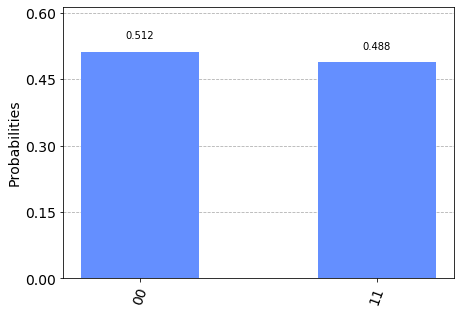

In [22]:
plot_histogram(R1)

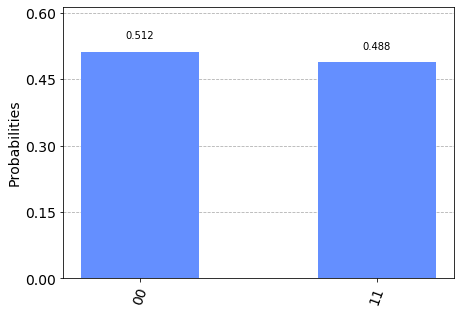

In [23]:
plot_histogram(R2)

In [24]:
result = execute(qk, my_backend, shots=10, memory=True).result()
memory = result.get_memory(qc)
print(memory)

NameError: name 'execute' is not defined